In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import fastf1 as f1
from ing_theme_matplotlib import mpl_style
import mplcyberpunk
from fastf1 import plotting

In [3]:
f1.Cache.enable_cache("../cache")

In [4]:
quali = f1.get_session(2024, "SINGAPORE", "Qualifying")
quali.load()

core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INF

In [5]:
quali.session_info

{'Meeting': {'Key': 1246,
  'Name': 'Singapore Grand Prix',
  'OfficialName': 'FORMULA 1 SINGAPORE AIRLINES SINGAPORE GRAND PRIX 2024',
  'Location': 'Marina Bay',
  'Country': {'Key': 157, 'Code': 'SGP', 'Name': 'Singapore'},
  'Circuit': {'Key': 61, 'ShortName': 'Singapore'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9602,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2024, 9, 21, 21, 0),
 'EndDate': datetime.datetime(2024, 9, 21, 22, 0),
 'GmtOffset': datetime.timedelta(seconds=28800),
 'Path': '2024/2024-09-22_Singapore_Grand_Prix/2024-09-21_Qualifying/'}

In [6]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,NaN,1.0,NaT,
1,VER,Red Bull Racing,NaN,2.0,NaT,
44,HAM,Mercedes,NaN,3.0,NaT,
63,RUS,Mercedes,NaN,4.0,NaT,
81,PIA,McLaren,NaN,5.0,NaT,
27,HUL,Haas F1 Team,NaN,6.0,NaT,
14,ALO,Aston Martin,NaN,7.0,NaT,
22,TSU,RB,NaN,8.0,NaT,
16,LEC,Ferrari,NaN,9.0,NaT,
55,SAI,Ferrari,NaN,10.0,NaT,


In [7]:
quali.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:36.482000,NOR,4,NaT,1.0,1.0,0 days 00:15:24.715000,NaT,NaT,0 days 00:00:51.613000,...,True,McLaren,0 days 00:15:24.715000,2024-09-21 13:01:38.552,1,NaN,False,,False,False
1,0 days 00:19:07.206000,NOR,4,0 days 00:01:30.724000,2.0,1.0,NaT,NaT,0 days 00:00:26.863000,0 days 00:00:38.252000,...,True,McLaren,0 days 00:17:36.482000,2024-09-21 13:03:50.319,1,NaN,False,,False,True
2,0 days 00:21:48.149000,NOR,4,NaT,3.0,1.0,NaT,0 days 00:21:12.899000,0 days 00:00:36.760000,0 days 00:00:53.201000,...,True,McLaren,0 days 00:19:07.206000,2024-09-21 13:05:21.043,1,NaN,False,,False,False
3,0 days 00:26:55.559000,NOR,4,NaT,4.0,2.0,0 days 00:24:57.106000,NaT,NaT,0 days 00:00:50.524000,...,False,McLaren,0 days 00:21:48.149000,2024-09-21 13:08:01.986,1,NaN,False,,False,False
4,0 days 00:28:25.561000,NOR,4,0 days 00:01:30.002000,5.0,2.0,NaT,NaT,0 days 00:00:26.735000,0 days 00:00:37.824000,...,False,McLaren,0 days 00:26:55.559000,2024-09-21 13:13:09.396,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0 days 00:23:40.707000,ZHO,24,0 days 00:01:32.514000,5.0,2.0,NaT,NaT,0 days 00:00:27.406000,0 days 00:00:38.914000,...,True,Kick Sauber,0 days 00:22:08.193000,2024-09-21 13:08:22.030,1,NaN,False,,False,True
272,0 days 00:25:38.814000,ZHO,24,0 days 00:01:58.107000,6.0,2.0,NaT,0 days 00:25:31.020000,0 days 00:00:31.065000,0 days 00:00:46.814000,...,True,Kick Sauber,0 days 00:23:40.707000,2024-09-21 13:09:54.544,1,NaN,False,,False,False
273,0 days 00:31:04.623000,ZHO,24,NaT,7.0,3.0,0 days 00:28:44.066000,NaT,NaT,0 days 00:00:54.494000,...,True,Kick Sauber,0 days 00:25:38.814000,2024-09-21 13:11:52.651,1,NaN,False,,False,False
274,0 days 00:32:36.677000,ZHO,24,0 days 00:01:32.054000,8.0,3.0,NaT,NaT,0 days 00:00:27.236000,0 days 00:00:38.783000,...,True,Kick Sauber,0 days 00:31:04.623000,2024-09-21 13:17:18.460,1,NaN,False,,False,True


In [8]:
nor = quali.get_driver("NOR")
nor

DriverNumber                                                          4
BroadcastName                                                  L NORRIS
Abbreviation                                                        NOR
DriverId                                                         norris
TeamName                                                        McLaren
TeamColor                                                        FF8000
TeamId                                                          mclaren
FirstName                                                         Lando
LastName                                                         Norris
FullName                                                   Lando Norris
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         GBR
Position                                                            1.0
ClassifiedPosition                                              

In [9]:
nor_laps = quali.laps.pick_driver("NOR")
nor_lap_time = nor_laps["LapTime"]
nor_sec1 = nor_laps["Sector1Time"]
nor_sec2 = nor_laps["Sector2Time"]
nor_sec3 = nor_laps["Sector3Time"]
nor_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:51.613000,0 days 00:00:33.558000,207.0,189.0,261.0,NaN
1,0 days 00:01:30.724000,0 days 00:00:26.863000,0 days 00:00:38.252000,0 days 00:00:25.609000,312.0,279.0,259.0,305.0
2,NaT,0 days 00:00:36.760000,0 days 00:00:53.201000,0 days 00:01:10.917000,201.0,205.0,NaN,253.0
3,NaT,NaT,0 days 00:00:50.524000,0 days 00:00:31.862000,198.0,185.0,261.0,NaN
4,0 days 00:01:30.002000,0 days 00:00:26.735000,0 days 00:00:37.824000,0 days 00:00:25.443000,310.0,278.0,259.0,303.0
5,0 days 00:02:09.270000,0 days 00:00:33.937000,0 days 00:00:50.394000,0 days 00:00:44.939000,200.0,168.0,NaN,261.0
6,NaT,NaT,0 days 00:00:52.211000,0 days 00:00:33.014000,227.0,215.0,260.0,NaN
7,0 days 00:01:30.007000,0 days 00:00:26.586000,0 days 00:00:37.678000,0 days 00:00:25.743000,312.0,279.0,257.0,303.0
8,0 days 00:02:04.166000,0 days 00:00:33.419000,0 days 00:00:49.113000,0 days 00:00:41.634000,222.0,188.0,NaN,267.0
9,NaT,NaT,0 days 00:00:52.253000,0 days 00:00:33.248000,130.0,221.0,262.0,NaN


In [10]:
fastest_nor = nor_laps.pick_fastest()
tele_nor = fastest_nor.get_telemetry().add_distance()
tele_nor.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,272,7,10927
3,274,7,10989
4,278,7,11090
5,279,7,11140
6,281,7,11190
...,...,...,...
679,262,6,10641
680,264,7,10582
681,268,7,10757
682,269,7,10813


In [11]:
ver = quali.get_driver("VER")
ver

DriverNumber                                                          1
BroadcastName                                              M VERSTAPPEN
Abbreviation                                                        VER
DriverId                                                 max_verstappen
TeamName                                                Red Bull Racing
TeamColor                                                        3671C6
TeamId                                                         red_bull
FirstName                                                           Max
LastName                                                     Verstappen
FullName                                                 Max Verstappen
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         NED
Position                                                            2.0
ClassifiedPosition                                              

In [12]:
ver_laps = quali.laps.pick_driver("VER")
ver_lap_time = ver_laps["LapTime"]
ver_sec1 = ver_laps["Sector1Time"]
ver_sec2 = ver_laps["Sector2Time"]
ver_sec3 = ver_laps["Sector3Time"]
ver_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
16,NaT,NaT,0 days 00:00:47.114000,0 days 00:00:37.881000,273.0,261.0,259.0,NaN
17,0 days 00:01:30.854000,0 days 00:00:26.800000,0 days 00:00:38.253000,0 days 00:00:25.801000,312.0,278.0,260.0,302.0
18,0 days 00:01:59.620000,0 days 00:00:33.235000,0 days 00:00:48.741000,0 days 00:00:37.644000,197.0,230.0,NaN,210.0
19,NaT,NaT,0 days 00:00:47.773000,0 days 00:00:34.412000,276.0,262.0,261.0,NaN
20,0 days 00:01:30.157000,0 days 00:00:26.763000,0 days 00:00:37.949000,0 days 00:00:25.445000,313.0,278.0,262.0,303.0
21,0 days 00:02:09.048000,0 days 00:00:38.819000,0 days 00:00:50.921000,0 days 00:00:39.308000,209.0,192.0,NaN,255.0
22,NaT,NaT,0 days 00:00:49.493000,0 days 00:00:28.257000,267.0,260.0,260.0,NaN
23,0 days 00:01:30.371000,0 days 00:00:26.728000,0 days 00:00:37.912000,0 days 00:00:25.731000,311.0,277.0,206.0,301.0
24,0 days 00:01:57.877000,0 days 00:00:34.488000,0 days 00:00:43.233000,0 days 00:00:40.156000,252.0,244.0,NaN,221.0
25,NaT,NaT,0 days 00:00:47.952000,0 days 00:00:28.130000,248.0,263.0,261.0,NaN


In [13]:
fastest_ver = ver_laps.pick_fastest()
tele_ver = fastest_ver.get_telemetry().add_distance()
tele_ver.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,267,6,10770
3,268,7,10770
4,269,7,10798
5,271,7,10826
6,273,7,10899
...,...,...,...
671,258,6,11577
672,261,6,11644
673,264,6,11711
674,265,6,11769


In [14]:
ham = quali.get_driver("HAM")
ham

DriverNumber                                                         44
BroadcastName                                                L HAMILTON
Abbreviation                                                        HAM
DriverId                                                       hamilton
TeamName                                                       Mercedes
TeamColor                                                        27F4D2
TeamId                                                         mercedes
FirstName                                                         Lewis
LastName                                                       Hamilton
FullName                                                 Lewis Hamilton
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         GBR
Position                                                            3.0
ClassifiedPosition                                              

In [15]:
ham_laps = quali.laps.pick_driver("HAM")
ham_lap_time = ham_laps["LapTime"]
ham_sec1 = ham_laps["Sector1Time"]
ham_sec2 = ham_laps["Sector2Time"]
ham_sec3 = ham_laps["Sector3Time"]
ham_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
34,NaT,NaT,0 days 00:00:51.543000,0 days 00:00:31.981000,237.0,222.0,259.0,NaN
35,0 days 00:01:31.355000,0 days 00:00:26.870000,0 days 00:00:38.376000,0 days 00:00:26.109000,311.0,279.0,254.0,302.0
36,NaT,0 days 00:00:41.850000,0 days 00:00:47.401000,0 days 00:01:09.481000,217.0,231.0,NaN,231.0
37,NaT,NaT,0 days 00:00:50.590000,0 days 00:00:32.694000,217.0,216.0,259.0,NaN
38,0 days 00:01:30.393000,0 days 00:00:26.883000,0 days 00:00:37.977000,0 days 00:00:25.533000,312.0,278.0,258.0,304.0
39,0 days 00:02:03.509000,0 days 00:00:37.373000,0 days 00:00:47.557000,0 days 00:00:38.579000,230.0,135.0,NaN,235.0
40,NaT,NaT,0 days 00:00:52.530000,0 days 00:00:33.252000,234.0,207.0,259.0,NaN
41,0 days 00:01:29.929000,0 days 00:00:26.742000,0 days 00:00:37.797000,0 days 00:00:25.390000,312.0,278.0,256.0,303.0
42,0 days 00:02:00.030000,0 days 00:00:36.314000,0 days 00:00:46.213000,0 days 00:00:37.503000,223.0,228.0,NaN,222.0
43,NaT,NaT,0 days 00:00:52.423000,0 days 00:00:31.994000,246.0,236.0,260.0,NaN


In [16]:
fastest_ham = ham_laps.pick_fastest()
tele_ham = fastest_ham.get_telemetry().add_distance()
tele_ham.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,271,7,11169
3,273,7,11216
4,274,7,11286
5,275,7,11356
6,276,7,11426
...,...,...,...
684,259,7,10789
685,260,7,10774
686,261,7,10807
687,262,7,10840


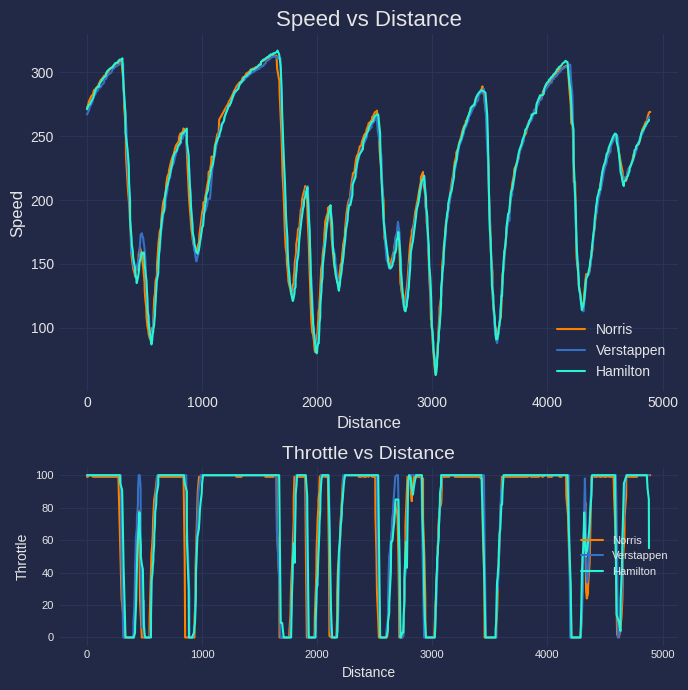

In [18]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_nor.Distance, tele_nor.Speed, label="Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_ver.Distance, tele_ver.Speed, label="Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_ham.Distance, tele_ham.Speed, label="Hamilton", color=get_driver_color("HAM")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_nor.Distance, tele_nor.Throttle, label="Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_ver.Distance, tele_ver.Throttle, label="Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_ham.Distance, tele_ham.Throttle, label="Hamilton", color=get_driver_color("HAM")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [19]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

In [20]:
driver1_sectors = pd.DataFrame(
    {
        "Driver": ["Norris"] * len(nor_sec1),
        "Sector1Time": nor_sec1,
        "Sector2Time": nor_sec2,
        "Sector3Time": nor_sec3,
        "Lap Time": nor_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
        "Driver": ["Veerstappen"] * len(ver_sec1),
        "Sector1Time": ver_sec1,
        "Sector2Time": ver_sec2,
        "Sector3Time": ver_sec3,
        "Lap Time": ver_lap_time,
    }
)

driver3_sectors = pd.DataFrame(
    {
        "Driver": ["Hamilton"] * len(ham_sec1),
        "Sector1Time": ham_sec1,
        "Sector2Time": ham_sec2,
        "Sector3Time": ham_sec3,
        "Lap Time": ham_lap_time,
    }
)



all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors],
    ignore_index=True,
)
all_drivers_sectors["Sector1Time"] = all_drivers_sectors["Sector1Time"].apply(
    convert_to_normal
)
# all_drivers_sectors["Sector2Time"] = all_drivers_sectors["Sector2Time"].apply(
#     convert_to_normal
# )
all_drivers_sectors["Sector3Time"] = all_drivers_sectors["Sector3Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Lap Time"] = all_drivers_sectors["Lap Time"].apply(
    convert_to_normal
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Norris,00:26.863000,0 days 00:00:38.252000,00:25.609000,01:30.724000
4,Norris,00:26.735000,0 days 00:00:37.824000,00:25.443000,01:30.002000
5,Norris,00:33.937000,0 days 00:00:50.394000,00:44.939000,02:09.270000
7,Norris,00:26.586000,0 days 00:00:37.678000,00:25.743000,01:30.007000
8,Norris,00:33.419000,0 days 00:00:49.113000,00:41.634000,02:04.166000
10,Norris,00:26.493000,0 days 00:00:42.596000,00:40.829000,01:49.918000
14,Norris,00:26.599000,0 days 00:00:37.630000,00:25.296000,01:29.525000
17,Veerstappen,00:26.800000,0 days 00:00:38.253000,00:25.801000,01:30.854000
18,Veerstappen,00:33.235000,0 days 00:00:48.741000,00:37.644000,01:59.620000
20,Veerstappen,00:26.763000,0 days 00:00:37.949000,00:25.445000,01:30.157000


*Race*

In [21]:
race = f1.get_session(2024, "SINGAPORE", "R")
race.load()

core           INFO 	Loading data for Singapore Grand Prix - Race [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No 

In [22]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,1.0,1.0,0 days 01:40:52.571000,Finished
1,VER,Red Bull Racing,2.0,2.0,0 days 00:00:20.945000,Finished
81,PIA,McLaren,5.0,3.0,0 days 00:00:41.823000,Finished
63,RUS,Mercedes,4.0,4.0,0 days 00:01:01.040000,Finished
16,LEC,Ferrari,9.0,5.0,0 days 00:01:02.430000,Finished
44,HAM,Mercedes,3.0,6.0,0 days 00:01:25.248000,Finished
55,SAI,Ferrari,10.0,7.0,0 days 00:01:36.039000,Finished
14,ALO,Aston Martin,7.0,8.0,NaT,+1 Lap
27,HUL,Haas F1 Team,6.0,9.0,NaT,+1 Lap
11,PER,Red Bull Racing,13.0,10.0,NaT,+1 Lap


In [23]:
laps = race.laps
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:58:41.686000,NOR,4,0 days 00:01:40.424000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.379000,...,True,McLaren,0 days 00:57:01.006000,2024-09-22 12:03:57.137,1,1.0,False,,False,False
1,0 days 01:00:20.166000,NOR,4,0 days 00:01:38.480000,2.0,1.0,NaT,NaT,0 days 00:00:29.268000,0 days 00:00:41.412000,...,True,McLaren,0 days 00:58:41.686000,2024-09-22 12:05:37.817,1,1.0,False,,False,True
2,0 days 01:01:58.572000,NOR,4,0 days 00:01:38.406000,3.0,1.0,NaT,NaT,0 days 00:00:29.354000,0 days 00:00:41.262000,...,True,McLaren,0 days 01:00:20.166000,2024-09-22 12:07:16.297,1,1.0,False,,False,True
3,0 days 01:03:37.018000,NOR,4,0 days 00:01:38.446000,4.0,1.0,NaT,NaT,0 days 00:00:29.399000,0 days 00:00:41.305000,...,True,McLaren,0 days 01:01:58.572000,2024-09-22 12:08:54.703,1,1.0,False,,False,True
4,0 days 01:05:14.956000,NOR,4,0 days 00:01:37.938000,5.0,1.0,NaT,NaT,0 days 00:00:29.034000,0 days 00:00:41.159000,...,True,McLaren,0 days 01:03:37.018000,2024-09-22 12:10:33.149,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0 days 01:15:35.033000,ALB,23,0 days 00:01:46.666000,11.0,1.0,NaT,0 days 01:15:27.422000,0 days 00:00:29.101000,0 days 00:00:42.374000,...,True,Williams,0 days 01:13:48.367000,2024-09-22 12:20:44.498,1,17.0,False,,False,False
1173,0 days 01:17:33.059000,ALB,23,0 days 00:01:58.026000,12.0,2.0,0 days 01:15:56.538000,NaT,0 days 00:00:49.705000,0 days 00:00:40.831000,...,True,Williams,0 days 01:15:35.033000,2024-09-22 12:22:31.164,1,19.0,False,,False,False
1174,0 days 01:19:09.947000,ALB,23,0 days 00:01:36.888000,13.0,2.0,NaT,NaT,0 days 00:00:28.928000,0 days 00:00:40.666000,...,True,Williams,0 days 01:17:33.059000,2024-09-22 12:24:29.190,1,19.0,False,,False,True
1175,0 days 01:20:48.687000,ALB,23,0 days 00:01:38.740000,14.0,2.0,NaT,NaT,0 days 00:00:29.358000,0 days 00:00:41.648000,...,True,Williams,0 days 01:19:09.947000,2024-09-22 12:26:06.078,1,19.0,False,,False,True


In [24]:
nor_race = race.laps.pick_driver("NOR")
fastest_lap_nor_race = nor_race.pick_fastest().LapTime
nor_race_lap_time = nor_race["LapTime"]
nor_race_sec1 = nor_race["Sector1Time"]
nor_race_sec2 = nor_race["Sector2Time"]
nor_race_sec3 = nor_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_nor_race),
    "which was in Lap number",
    nor_race.pick_fastest().LapNumber,
)
nor_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:34.925000 which was in Lap number 48.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:40.424000,NaT,0 days 00:00:41.379000,0 days 00:00:27.852000,282.0,258.0,241.0,186.0
1,0 days 00:01:38.480000,0 days 00:00:29.268000,0 days 00:00:41.412000,0 days 00:00:27.800000,269.0,258.0,241.0,276.0
2,0 days 00:01:38.406000,0 days 00:00:29.354000,0 days 00:00:41.262000,0 days 00:00:27.790000,278.0,260.0,242.0,270.0
3,0 days 00:01:38.446000,0 days 00:00:29.399000,0 days 00:00:41.305000,0 days 00:00:27.742000,271.0,257.0,240.0,272.0
4,0 days 00:01:37.938000,0 days 00:00:29.034000,0 days 00:00:41.159000,0 days 00:00:27.745000,278.0,258.0,240.0,278.0


In [25]:
fastest_lap_race_nor = nor_race.pick_fastest()
tele_race_nor = fastest_lap_race_nor.get_telemetry().add_distance()
speed_race_nor = tele_race_nor.Speed
tele_race_nor.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,261,6,11206
3,263,6,10906
4,264,6,10766
5,266,7,10627
6,267,7,10679
...,...,...,...
745,254,6,11560
746,256,6,11646
747,258,6,11732
748,261,6,11402


In [26]:
ver_race = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race.pick_fastest().LapTime
ver_race_lap_time = ver_race["LapTime"]
ver_race_sec1 = ver_race["Sector1Time"]
ver_race_sec2 = ver_race["Sector2Time"]
ver_race_sec3 = ver_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_ver_race),
    "which was in Lap number",
    ver_race.pick_fastest().LapNumber,
)
ver_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:35.967000 which was in Lap number 59.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
62,0 days 00:01:41.413000,NaT,0 days 00:00:41.689000,0 days 00:00:27.888000,281.0,261.0,242.0,189.0
63,0 days 00:01:38.790000,0 days 00:00:29.027000,0 days 00:00:41.805000,0 days 00:00:27.958000,293.0,252.0,244.0,276.0
64,0 days 00:01:38.917000,0 days 00:00:29.353000,0 days 00:00:41.641000,0 days 00:00:27.923000,283.0,255.0,243.0,274.0
65,0 days 00:01:38.470000,0 days 00:00:29.193000,0 days 00:00:41.518000,0 days 00:00:27.759000,281.0,256.0,242.0,273.0
66,0 days 00:01:37.906000,0 days 00:00:29.031000,0 days 00:00:41.310000,0 days 00:00:27.565000,283.0,256.0,244.0,275.0


In [27]:
fastest_lap_race_ver = ver_race.pick_fastest()
tele_race_ver = fastest_lap_race_ver.get_telemetry().add_distance()
speed_race_ver = tele_race_ver.Speed
tele_race_ver.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,258,6,11618
3,259,6,11636
4,262,6,11209
5,265,6,10783
6,266,6,10767
...,...,...,...
716,252,6,11308
717,253,6,11345
718,255,6,11382
719,258,6,11502


In [29]:
ham_race = race.laps.pick_driver("HAM")
fastest_lap_ham_race = ham_race.pick_fastest().LapTime
ham_race_lap_time = ham_race["LapTime"]
ham_race_sec1 = ham_race["Sector1Time"]
ham_race_sec2 = ham_race["Sector2Time"]
ham_race_sec3 = ham_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_ham_race),
    "which was in Lap number",
    ham_race.pick_fastest().LapNumber,
)
ham_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:37.393000 which was in Lap number 43.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
310,0 days 00:01:42.702000,NaT,0 days 00:00:42.472000,0 days 00:00:27.790000,283.0,262.0,244.0,195.0
311,0 days 00:01:38.853000,0 days 00:00:29.507000,0 days 00:00:41.692000,0 days 00:00:27.654000,292.0,262.0,245.0,283.0
312,0 days 00:01:39.254000,0 days 00:00:29.487000,0 days 00:00:41.873000,0 days 00:00:27.894000,280.0,257.0,245.0,276.0
313,0 days 00:01:39.068000,0 days 00:00:29.596000,0 days 00:00:41.861000,0 days 00:00:27.611000,279.0,256.0,246.0,271.0
314,0 days 00:01:38.294000,0 days 00:00:29.286000,0 days 00:00:41.477000,0 days 00:00:27.531000,283.0,253.0,246.0,272.0


In [30]:
fastest_lap_race_ham = ham_race.pick_fastest()
tele_race_ham = fastest_lap_race_ham.get_telemetry().add_distance()
speed_race_ham = tele_race_ham.Speed
tele_race_ham.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,254,7,10493
3,255,7,10536
4,257,7,10626
5,259,7,10716
6,261,7,10774
...,...,...,...
742,248,6,11671
743,250,6,11052
744,252,7,10434
745,253,7,10507


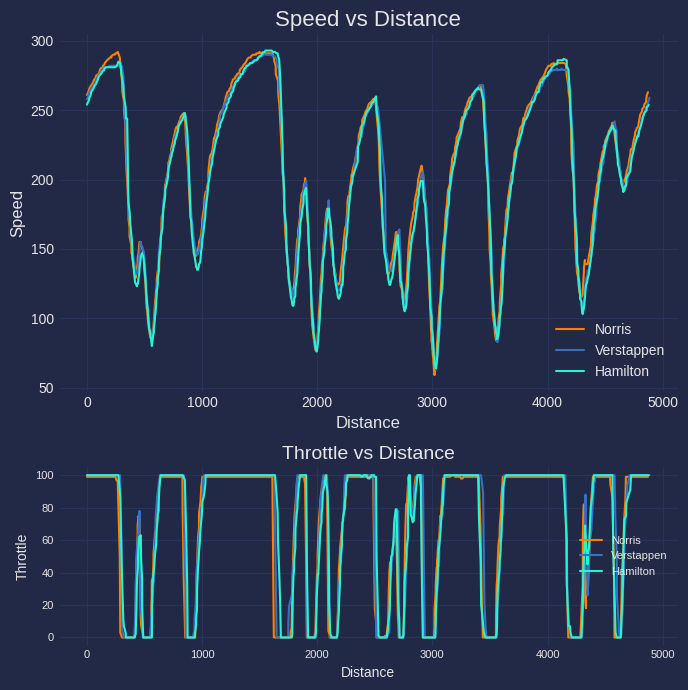

In [31]:
def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_race_nor.Distance,
    tele_race_nor.Speed,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[0].plot(
    tele_race_ver.Distance,
    tele_race_ver.Speed,
    label="Verstappen",
    color=get_driver_color("VER"),
)
ax[0].plot(
    tele_race_ham.Distance,
    tele_race_ham.Speed,
    label="Hamilton",
    color=get_driver_color("HAM"),
)
ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_race_nor.Distance,
    tele_race_nor.Throttle,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[1].plot(
    tele_race_ver.Distance,
    tele_race_ver.Throttle,
    label="Verstappen",
    color=get_driver_color("VER"),
)
ax[1].plot(
    tele_race_ham.Distance,
    tele_race_ham.Throttle,
    label="Hamilton",
    color=get_driver_color("HAM"),
)
ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [32]:
driver1_sectors = pd.DataFrame({
    'Driver': ['Norris'] * len(nor_race_sec1),
    'Sector1Time': nor_race_sec1,
    'Sector2Time': nor_race_sec2,
    'Sector3Time': nor_race_sec3,
    'Lap Time' : nor_race_lap_time
})

driver2_sectors = pd.DataFrame({
    'Driver': ['Verstappen'] * len(ver_race_sec1),
    'Sector1Time': ver_race_sec1,
    'Sector2Time': ver_race_sec2,
    'Sector3Time': ver_race_sec3,
    'Lap Time' : ver_race_lap_time
})

driver3_sectors = pd.DataFrame({
    'Driver': ['Hamilton'] * len(ham_race_sec1),
    'Sector1Time': ham_race_sec1,
    'Sector2Time': ham_race_sec2,
    'Sector3Time': ham_race_sec3,
    'Lap Time' : ham_race_lap_time
})


all_drivers_sectors = pd.concat([driver1_sectors, driver2_sectors, driver3_sectors], ignore_index=True)
all_drivers_sectors['Sector1Time'] = all_drivers_sectors['Sector1Time'].apply(convert_to_normal)
all_drivers_sectors['Sector2Time'] = all_drivers_sectors['Sector2Time'].apply(convert_to_normal)
all_drivers_sectors['Sector3Time'] = all_drivers_sectors['Sector3Time'].apply(convert_to_normal)
all_drivers_sectors['Lap Time'] = all_drivers_sectors['Lap Time'].apply(convert_to_normal)
all_drivers_sectors.sort_values(by=["Sector1Time","Sector2Time","Sector3Time"],ascending=True).dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
47,Norris,00:28.238000,00:40.206000,00:26.481000,01:34.925000
45,Norris,00:28.332000,00:40.577000,00:27.044000,01:35.953000
120,Verstappen,00:28.352000,00:40.694000,00:26.921000,01:35.967000
122,Verstappen,00:28.446000,00:40.738000,00:26.829000,01:36.013000
52,Norris,00:28.491000,00:40.695000,00:27.249000,01:36.435000
...,...,...,...,...,...
127,Hamilton,00:29.596000,00:41.861000,00:27.611000,01:39.068000
149,Hamilton,00:30.049000,00:42.374000,00:27.748000,01:40.171000
30,Norris,00:49.556000,00:41.249000,00:27.603000,01:58.408000
141,Hamilton,00:49.715000,00:41.657000,00:27.336000,01:58.708000


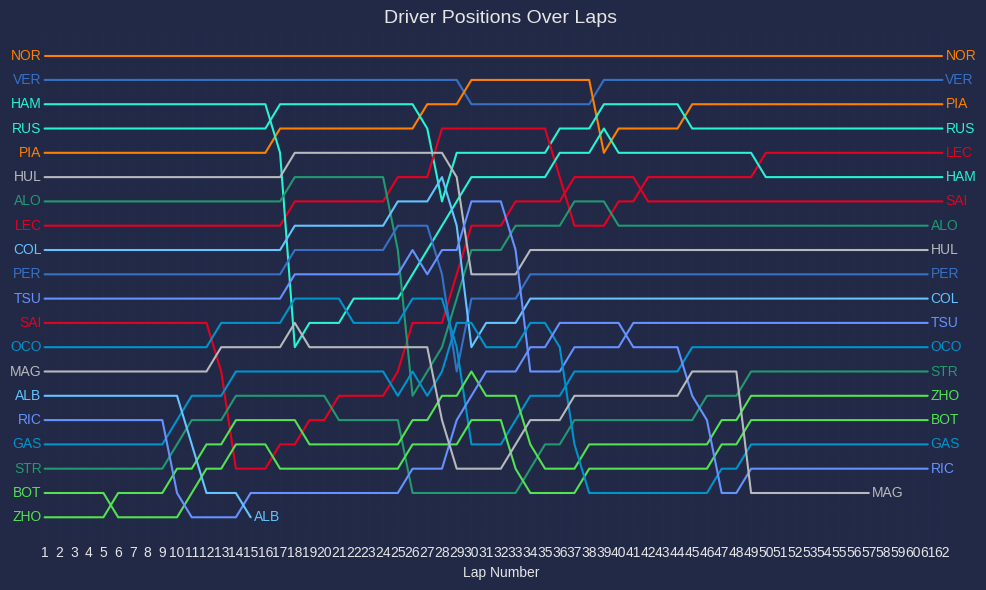

In [33]:
# Get unique drivers and total number of laps
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

# Initialize an empty dictionary to store team colors
team_colors = {}

# Fetch the team color for each driver dynamically and convert to RGB
for driver in drivers_ab:
    driver_object = quali.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

# Plot each driver's positions with their team color
plt.figure(figsize=(10, 6))  # Adjust figure size
for driver in drivers_ab:
    positions = laps[laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))  # Default to gray if no color is specified
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    # Annotate driver name at the start of the line
    plt.text(
        1 - 0.2,  # Slightly to the left of the first lap
        positions[0],  # Y-coordinate of the first position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='right'  # Align text to the right of the point
    )
    
    # Annotate driver name at the end of the line
    plt.text(
        len(positions) + 0.2,  # Slightly to the right of the last lap
        positions[-1],  # Y-coordinate of the last position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='left'  # Align text to the left of the point
    )

# Add plot title and labels
plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)  # Extend x-axis to leave space for annotations
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()  # Invert y-axis so positions are ranked correctly
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

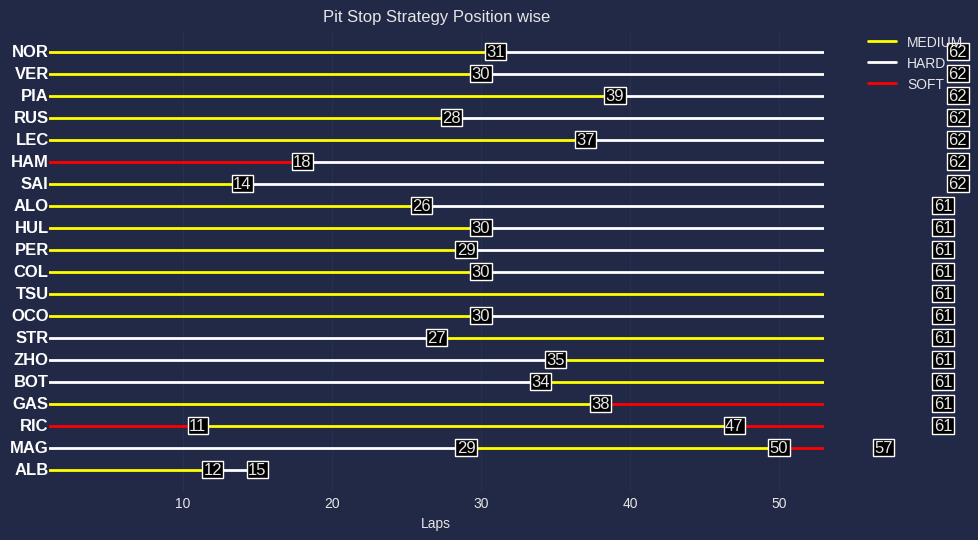

In [34]:
def getDriverPosition(abbreviation: str):
    res = race.results
    c = res["Abbreviation"] == abbreviation
    pos = res.loc[c, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "unknown")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()


In [35]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)
    

/tmp/ipykernel_62034/2770152713.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
0,NOR,290.0
1,VER,294.0
17,RIC,294.0
14,ZHO,295.0
11,TSU,295.0
8,HUL,295.0
19,ALB,296.0
12,OCO,297.0
5,HAM,298.0
6,SAI,298.0


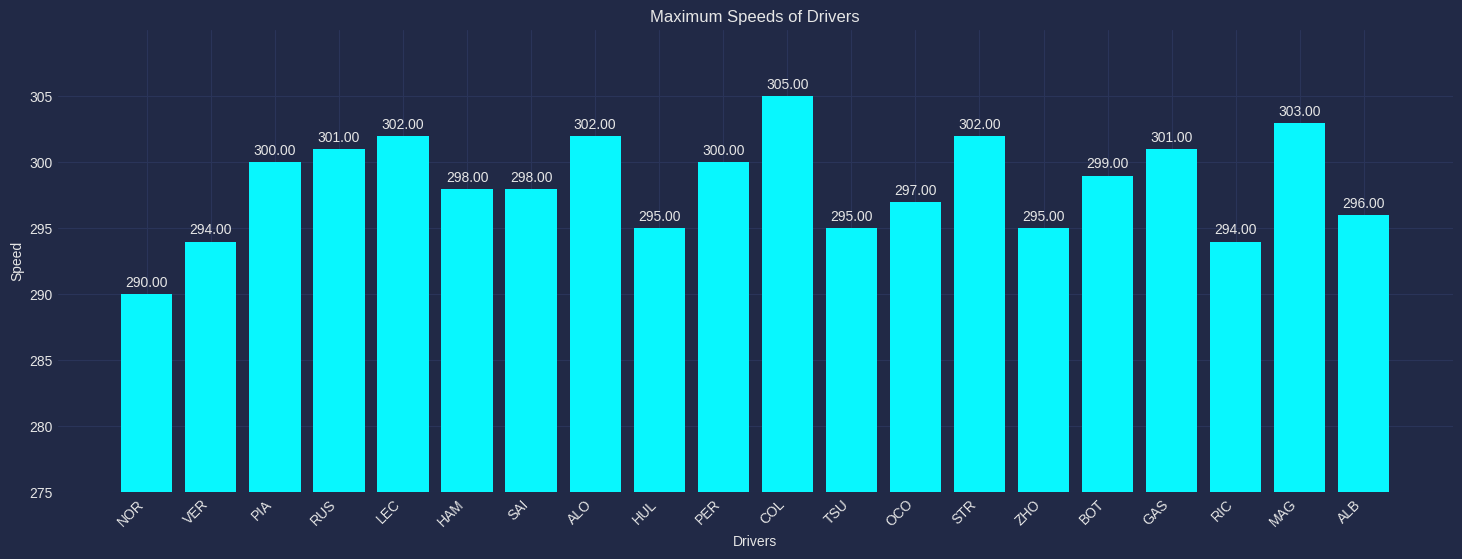

In [36]:
fig,ax = plt.subplots(figsize=(18, 6))


bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])

ax.set_xlabel('Drivers')

ax.set_ylabel('Speed')

ax.set_title('Maximum Speeds of Drivers')

plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Display the plot
plt.show()

In [37]:
plotting.setup_mpl()

In [38]:
laps_nor = laps.pick_driver("NOR")
laps_ver = laps.pick_driver("VER")

fastest_nor = laps_nor.pick_fastest().get_telemetry().add_distance()
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()

fastest_nor["Driver"] = "NOR"
fastest_ver["Driver"] = "VER"
telemetry = pd.concat([fastest_nor,fastest_ver])

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [39]:
num_minisectors = 25

total_distance = total_distance = max(telemetry['Distance'])

minisector_length = total_distance / num_minisectors

In [40]:
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [41]:

telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [42]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,NOR,275.285714
1,1,VER,272.450000
2,2,NOR,240.375000
3,2,VER,245.560000
4,3,NOR,119.347826
5,3,VER,117.891304
6,4,NOR,178.354839
7,4,VER,176.833333
8,5,NOR,193.400000
9,5,VER,192.320000


In [43]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [44]:

# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'NOR', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 2

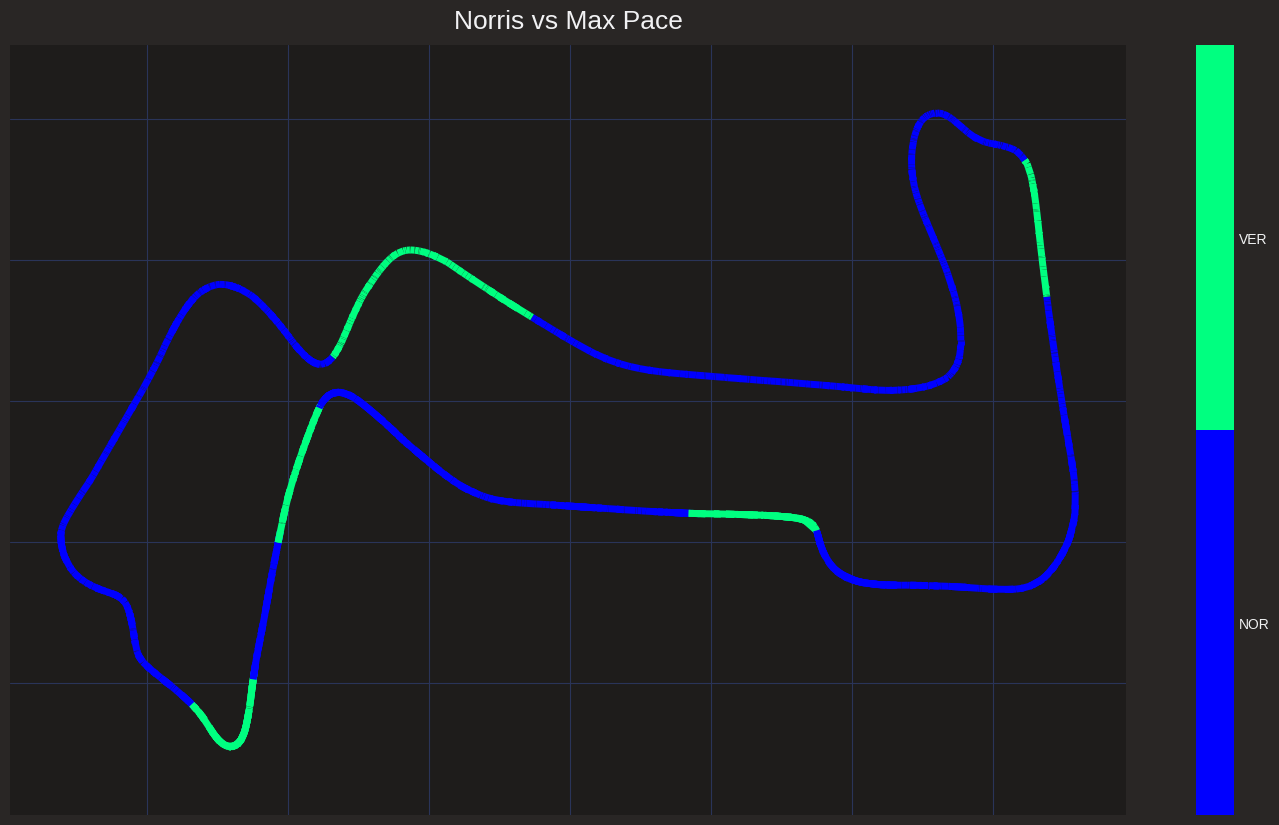

In [45]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Adjust the colorbar settings
cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['NOR', 'VER'])
plt.title("Norris vs Max Pace")
plt.show()
